#### Minimal values of $\varphi(n)/n$ 

Let $p_1,\dotsc,p_k$ be the first $k$ prime numbers, and define
$P_k=p_1p_2\cdots p_k$, $N_k=\varphi(P_k)=(p_1-1)\cdots(p_{k-1})$,
and $m_k=N_k/P_k$. Then $m_1,m_2,\dotsc,m_k,\dotsc$ is a decreasing sequence
amb $m_k$ is the minimum value of $\varphi(n)/n$ for $n\in [P_k,P_{k+1})$.

The function **PN(k)** computes the the dictionary whose items have the form
$j:(p_j,P_j,m_j)$, $1\le j\le k$. This function is then used to construct a the table
$$
\begin{matrix}
k & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\ 
p_k & 2 & 3 & 5 & 7 & 11 & 13 & 17 & 19 & 23 & 29  \\  
P_k & 2 & 6 & 30 & 210 & 2310 & 30030 & 510510 & 9699690 & 223092870 & 6469693230  \\ 
m_k & 0.5 & 0.3333 & 0.2666 & 0.2285 & 0.2077 & 0.1918 & 0.1805 & 0.1710 & 0.1635 & 0.1579   
\end{matrix} 
$$


In [3]:
from PyM import *

def PN(k):
    p = 2
    N = 1; P = 2
    j = 1
    T = {j:(p,N,P,N/P)}    
    while j<k:
        p = next_prime(p+1)
        N *= (p-1); P *= p
        j += 1
        T[j] = (p,N,P,N/P)  
    return T

In [4]:
k = 11

T = PN(k)

K = [j+1 for j in range(k)]

pk = [T[j][0] for j in K]

Pk = [T[j][2] for j in K]

decimals(4)

mk = [T[j][3] for j in K]

show(matrix([K,pk,Pk,mk]))


[[1	2	3	4	5	6	7	8	9	10	11]
 [2	3	5	7	11	13	17	19	23	29	31]
 [2	6	30	210	2310	30030	510510	9699690	223092870	6469693230	200560490130]
 [0.5	0.3333	0.2667	0.2286	0.2078	0.1918	0.1805	0.171	0.1636	0.1579	0.1529]] 



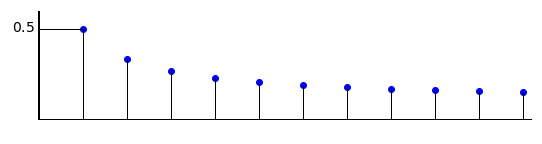

In [6]:
O = (0,0); X = (11.2,0); Y = (0,0.6)

close('all')

ax = plt.figure("Minimal values of $\phi(n)/n$", figsize=(9,2))
plt.xlim(-0.2,11.2)
plt.ylim(0.0,0.6)
plt.axis('off')

for j in K: 
    bullet((j,mk[j-1]), color='blue')
    seg((j,0),(j,mk[j-1]),lw=1)


# Lines
seg(O,X,lw=2)
seg(O,Y,lw=2)
seg((0,0.5),(1,0.5),lw=1)

eps = 0.1
lable((0,0.5),'$0.5$',dx=-6*eps,dy=-0.15*eps,fs=14)

plt.show()  